In [73]:
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
tqdm.pandas()

### What relationships exist between weather attributes and energy consumption?

In [74]:
data_path = Path("../data")
energy_weather_data_path = data_path/"output"/"energy_weather_data.parquet"
energy_weather_df = pd.read_parquet(energy_weather_data_path)

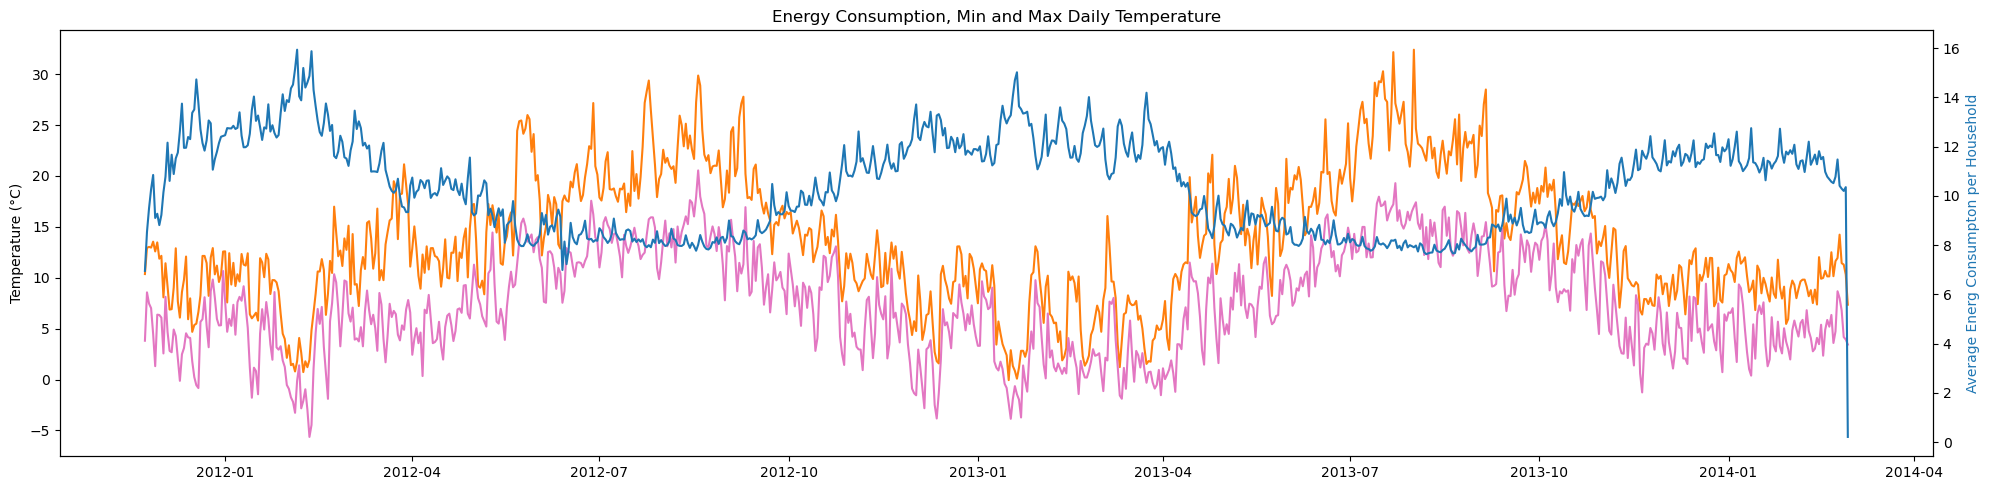

In [75]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(energy_weather_df.index, energy_weather_df['temperatureMax'], color='tab:orange')
ax1.plot(energy_weather_df.index, energy_weather_df['temperatureMin'], color='tab:pink')
ax1.set_ylabel('Temperature (°C)')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energ Consumpton per Household', color='tab:blue')
plt.title('Energy Consumption, Min and Max Daily Temperature')
fig.tight_layout()
plt.show()

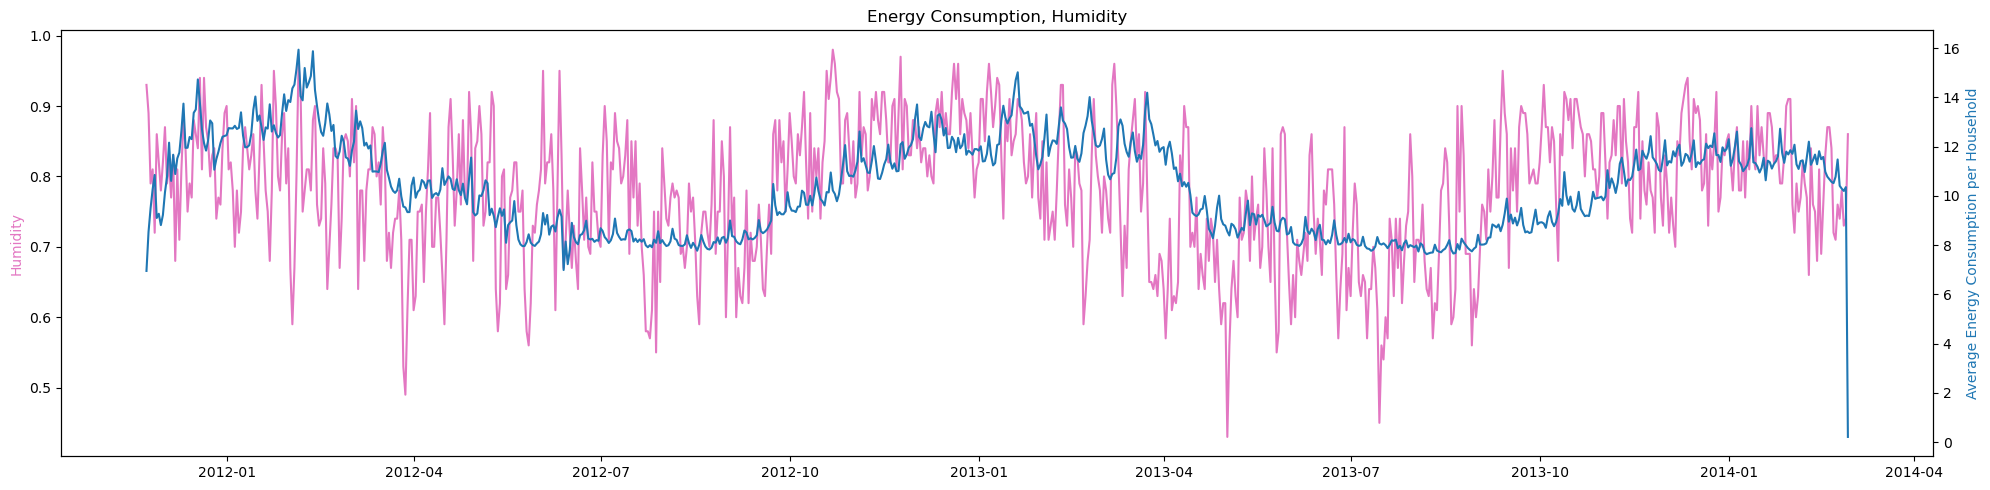

In [76]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(energy_weather_df.index, energy_weather_df['humidity'], color='tab:pink')
ax1.set_ylabel('Humidity',color = 'tab:pink')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energy Consumption per Household', color='tab:blue')
plt.title('Energy Consumption, Humidity')
fig.tight_layout()
plt.show()

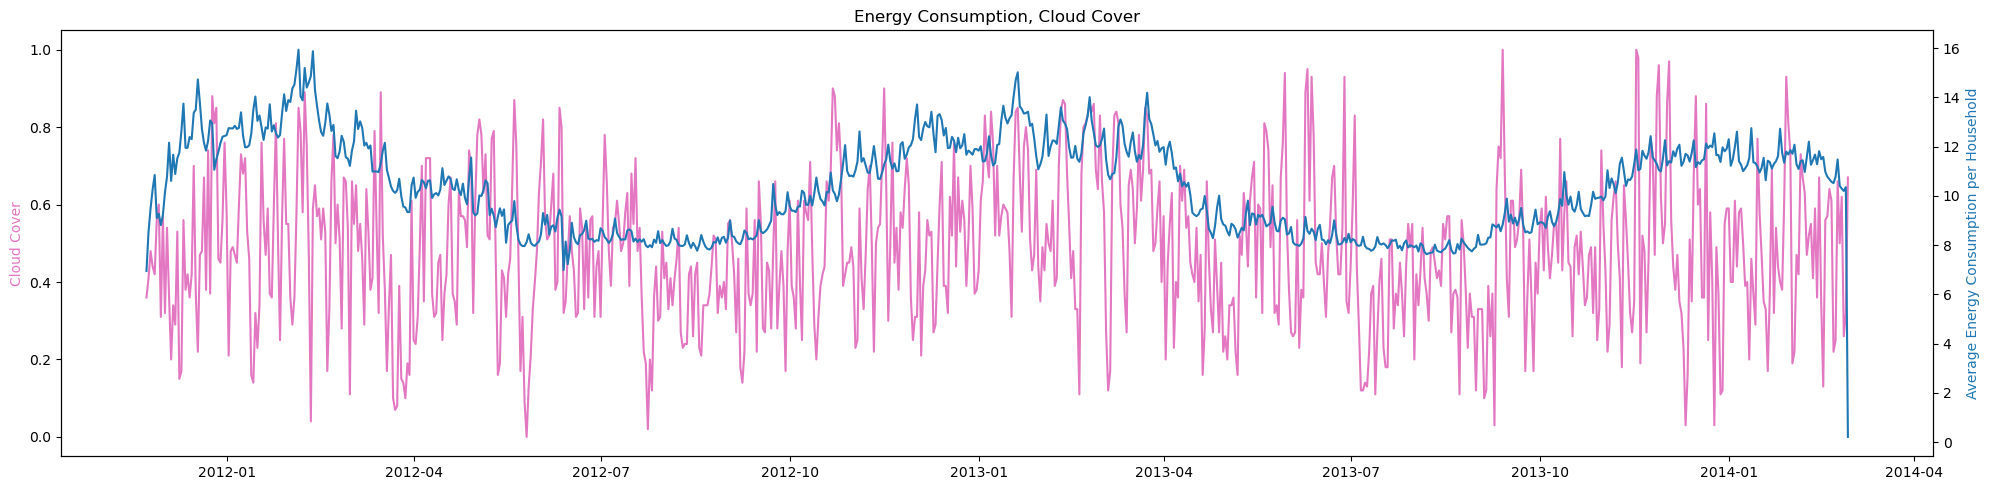

In [77]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(energy_weather_df.index, energy_weather_df['cloudCover'], color='tab:pink')
ax1.set_ylabel('Cloud Cover', color='tab:pink')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energy Consumption per Household', color='tab:blue')
plt.title('Energy Consumption, Cloud Cover')
fig.tight_layout()
plt.show()

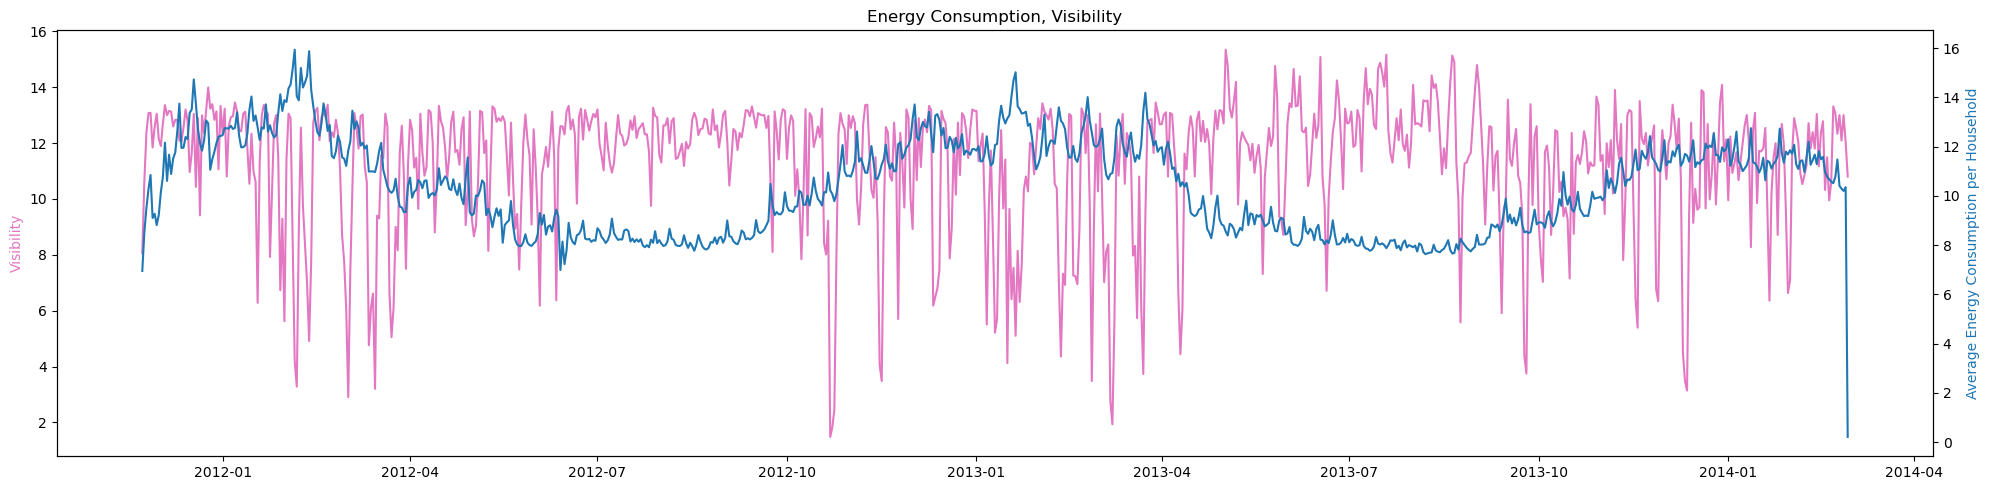

In [78]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(energy_weather_df.index, energy_weather_df['visibility'], color='tab:pink')
ax1.set_ylabel('Visibility', color='tab:pink')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energy Consumption per Household', color='tab:blue')
plt.title('Energy Consumption, Visibility')
fig.tight_layout()
plt.show()

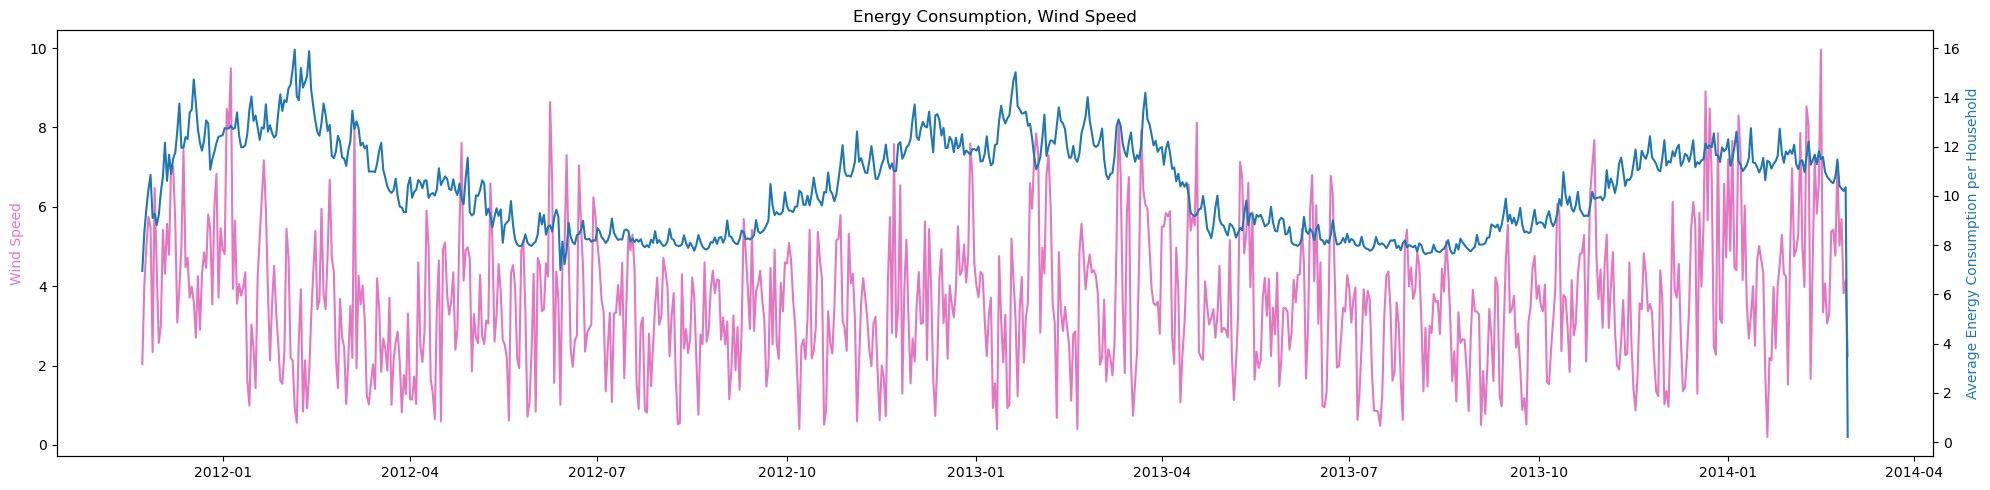

In [79]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(energy_weather_df.index, energy_weather_df['windSpeed'], color='tab:pink')
ax1.set_ylabel('Wind Speed', color='tab:pink')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energy Consumption per Household', color='tab:blue')
plt.title('Energy Consumption, Wind Speed')
fig.tight_layout()
plt.show()

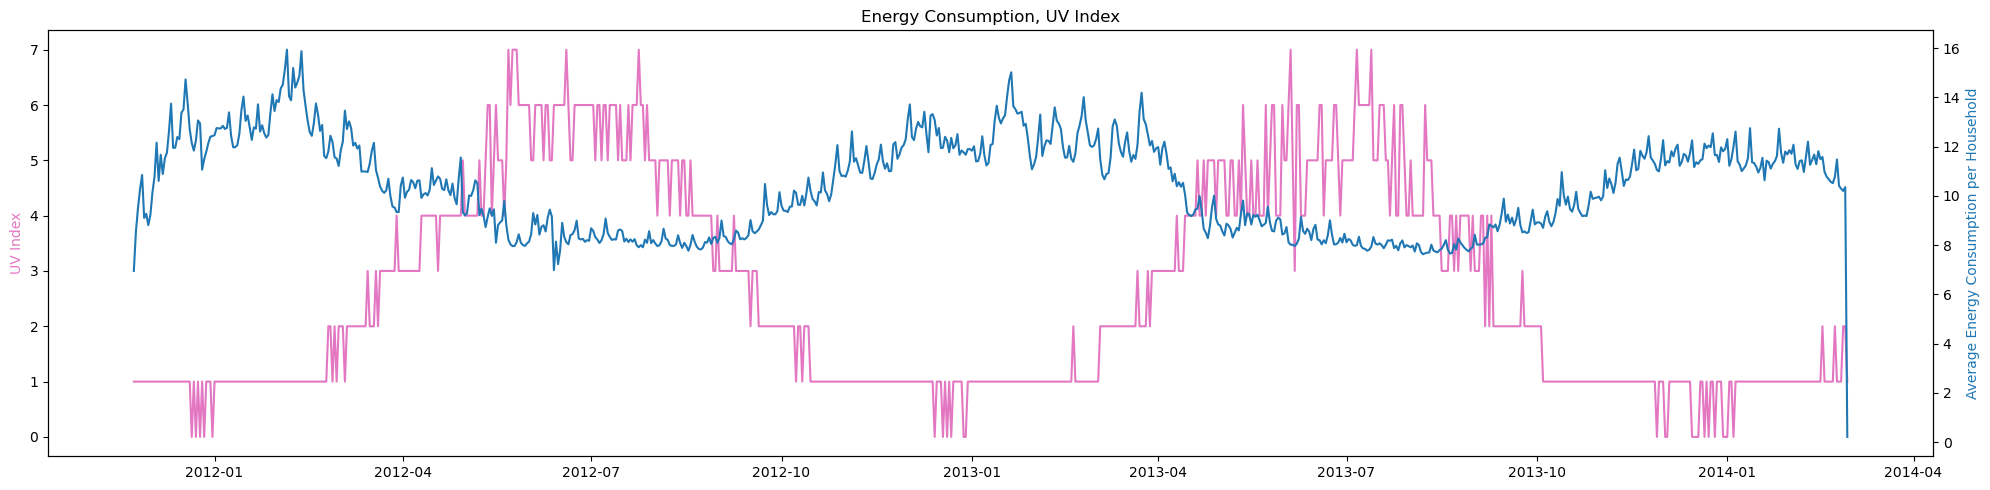

In [80]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(energy_weather_df.index, energy_weather_df['uvIndex'], color='tab:pink')
ax1.set_ylabel('UV Index', color='tab:pink')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energy Consumption per Household', color='tab:blue')
plt.title('Energy Consumption, UV Index')
fig.tight_layout()
plt.show()

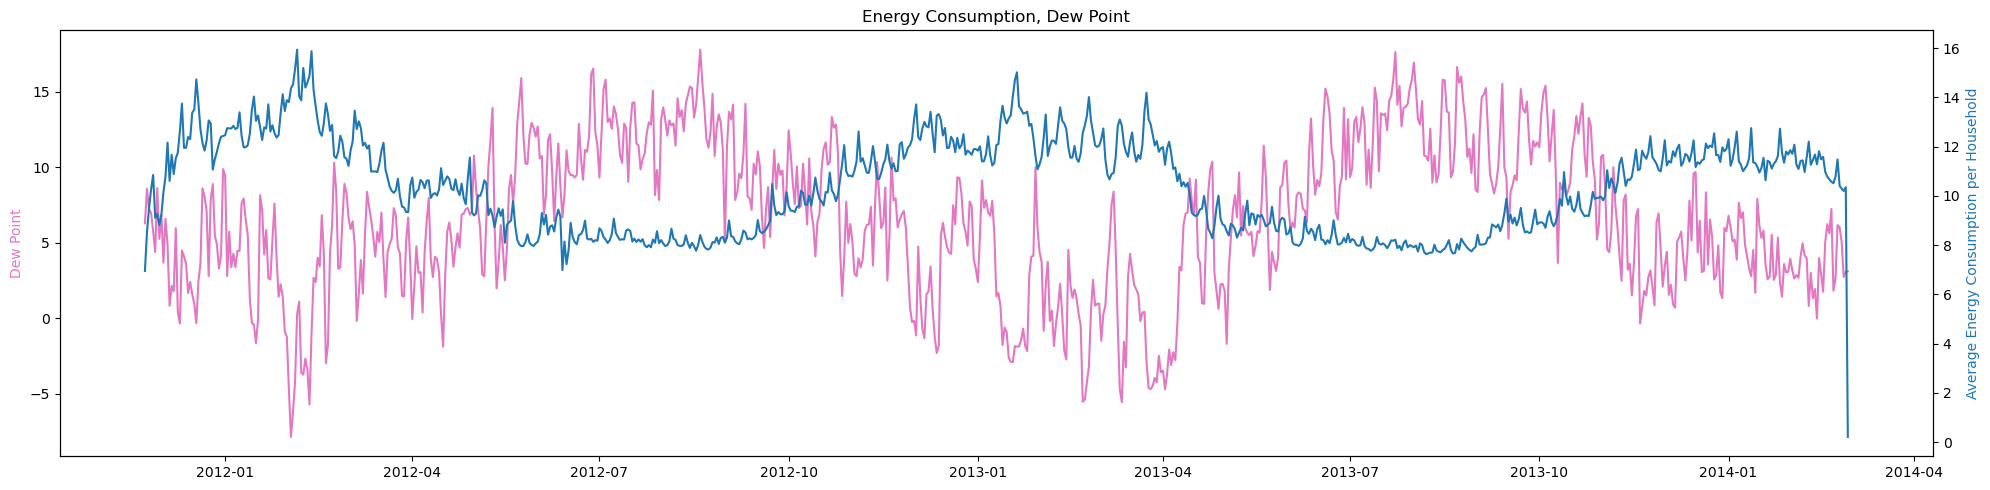

In [81]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(energy_weather_df.index, energy_weather_df['dewPoint'], color='tab:pink')
ax1.set_ylabel('Dew Point', color='tab:pink')
ax2 = ax1.twinx()
ax2.plot(energy_weather_df.index, energy_weather_df['average_energy'], color='tab:blue')
ax2.set_ylabel('Average Energy Consumption per Household', color='tab:blue')
plt.title('Energy Consumption, Dew Point')
fig.tight_layout()
plt.show()

It looks as though there's at least some correlation between energy consumption and the various weather attributes, and possible collinearity between weather attributes.

### Measuring stationarity of the time series

We can intuitively think about stationarity as the state where the statistical properties of the distribution from which the time series is sampled remain constant over time.

- Trend - does the mean change over time?
- Heteroscedasticity - does the variance change over time?
- Seasonality - are there periodic changes in the mean?
- Unit root - does the time series resemble a random walk?

In [82]:
# Define some columns of interest for examining stationarity
columns_of_interest = [
    'total_energy',
    'average_energy',
    'temperatureMax',
    'windBearing',
    'dewPoint',
    'cloudCover',
    'windSpeed',
    'pressure',
    'apparentTemperatureHigh',
    'visibility',
    'humidity',
    'apparentTemperatureLow',
    'apparentTemperatureMax',
    'uvIndex',
    'temperatureLow',
    'temperatureMin',
    'temperatureHigh',
    'apparentTemperatureMin'
]

In [92]:
# If p < 0.05, there is a 95% probability that the series does not have a unit root; 
# the series is stationary from a unit root perspective

# Perform augmented Dickey-Fuller test on columns of interest
def get_adfuller_p_values(df, column_names, threshold=0.05):
    p_values_df = pd.DataFrame(columns=['series_name', 'p_value', 'is_stationary'])
    for column in column_names:

        # Perform the ADF test on the column
        result = adfuller(df[column])
        
        # Extract the p-value from the result
        p_value = result[1]

        # Create a temporary DataFrame with the column name and p-value
        temp_df = pd.DataFrame({'series_name': [column], 'p_value': [p_value], 'is_stationary': p_value < threshold})
    
        # Concatenate the temporary DataFrame with the main DataFrame
        p_values_df = pd.concat([p_values_df, temp_df], ignore_index=True)

    return p_values_df.sort_values(by='is_stationary')

In [93]:
get_adfuller_p_values(energy_weather_df, columns_of_interest)

,series_name,p_value,is_stationary
0,total_energy,4.388960e-01,False
13,uvIndex,5.780219e-01,False
17,apparentTemperatureMin,1.046536e-01,False
1,average_energy,4.048682e-01,False
2,temperatureMax,6.289285e-02,False
3,windBearing,6.857644e-17,True
4,dewPoint,2.964318e-02,True
5,cloudCover,3.500868e-19,True
6,windSpeed,4.582939e-30,True
7,pressure,4.045230e-13,True
